In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/raw/dataset.csv')

df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_32076\3466409577.py:1: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/dataset.csv')


,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


In [3]:
df.describe(include='all')

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
count,195196,195196.000000,195196,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,...,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000
unique,52537,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NACC874179,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,NaN,119769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4999.759252,NaN,2.355919,6.364260,15.437145,2014.374101,3.820965,6.641929,5.774811,...,-3.916356,-3.913712,-3.918195,-3.914148,-3.916807,-3.899101,-3.969979,-3.968734,-3.969379,-3.970245
std,NaN,2980.944552,NaN,0.698246,3.395659,8.606407,5.331593,3.100083,4.248845,3.955649,...,0.747503,0.782803,0.743216,0.771894,0.746140,0.812174,0.461850,0.473300,0.463654,0.462078
min,NaN,186.000000,NaN,1.000000,1.000000,1.000000,2005.000000,1.000000,1.000000,1.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
25%,NaN,2289.000000,NaN,2.000000,3.000000,8.000000,2010.000000,1.000000,3.000000,3.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
50%,NaN,4967.000000,NaN,2.000000,6.000000,15.000000,2014.000000,3.000000,6.000000,5.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
75%,NaN,8361.000000,NaN,3.000000,9.000000,23.000000,2019.000000,5.000000,9.000000,8.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000


In [4]:
print(df.columns)


Index(['NACCID', 'NACCADC', 'PACKET', 'FORMVER', 'VISITMO', 'VISITDAY',
       'VISITYR', 'NACCVNUM', 'NACCAVST', 'NACCNVST',
       ...
       'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN',
       'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'],
      dtype='object', length=1024)


In [5]:
# Check if 'DEMENTED' column exists and get its index
if 'DEMENTED' in df.columns:
    column_index = df.columns.get_loc('DEMENTED')
    print(f"The 'DEMENTED' column exists at index {column_index}.")
else:
    print("The 'DEMENTED' column does not exist in the dataset.")

The 'DEMENTED' column exists at index 578.


In [6]:
print(df['DEMENTED'].sample(5))  # Randomly prints 5 rows from the 'DEMENTED' column


100912    0
103850    0
109240    0
101311    0
118383    0
Name: DEMENTED, dtype: int64


In [7]:
# Print all the column names in the dataset to find the correct ones
print(df.columns.tolist())


['NACCID', 'NACCADC', 'PACKET', 'FORMVER', 'VISITMO', 'VISITDAY', 'VISITYR', 'NACCVNUM', 'NACCAVST', 'NACCNVST', 'NACCDAYS', 'NACCFDYS', 'NACCCORE', 'NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'HISPORX', 'RACE', 'RACEX', 'RACESEC', 'RACESECX', 'RACETER', 'RACETERX', 'PRIMLANG', 'PRIMLANX', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'INBIRMO', 'INBIRYR', 'INSEX', 'NEWINF', 'INHISP', 'INHISPOR', 'INHISPOX', 'NACCNINR', 'INRACE', 'INRACEX', 'INRASEC', 'INRASECX', 'INRATER', 'INRATERX', 'INEDUC', 'INRELTO', 'INRELTOX', 'INKNOWN', 'INLIVWTH', 'INVISITS', 'INCALLS', 'INRELY', 'NACCFAM', 'NACCMOM', 'NACCDAD', 'NACCAM', 'NACCAMX', 'NACCAMS', 'NACCAMSX', 'NACCFM', 'NACCFMX', 'NACCFMS', 'NACCFMSX', 'NACCOM', 'NACCOMX', 'NACCOMS', 'NACCOMSX', 'NACCFADM', 'NACCFFTD', 'ANYMEDS', 'DRUG1', 'DRUG2', 'DRUG3', 'DRUG4', 'DRUG5', 'DRUG6', 'DRUG7', 'DRUG8', 'DRUG9', 'DRUG10', 'DRUG11', 'DRUG12', 'DRUG13', 'DRUG14', 'DRUG15', 'DRUG16', 'DRUG17', 'DRUG18'

In [8]:
# Define the non-medical columns 
non_medical_cols = ['NACCAGE', 'EDUC', 'TOBAC30', 'SMOKYRS', 'ALCOCCAS', 'ALCFREQ', 'MARISTAT', 'NACCLIVS']

# Check if these columns exist in the dataset
missing_cols = [col for col in non_medical_cols if col not in df.columns]

if missing_cols:
    print(f"The following non-medical columns are missing from the dataset: {missing_cols}")
else:
    print("All specified non-medical columns exist in the dataset.")

# If the columns exist, proceed to extract data
X = df[non_medical_cols]
y = df['DEMENTED']  

print(X.head())


All specified non-medical columns exist in the dataset.
   NACCAGE  EDUC  TOBAC30  SMOKYRS  ALCOCCAS  ALCFREQ  MARISTAT  NACCLIVS
0       70    16        0        0         1        2         1         4
1       71    16       -4       -4        -4       -4         1         2
2       66    16        0        0         1        4         1         2
3       63    16        0        0         0        8         1         2
4       77    12        0        0         1        0         3         1


In [9]:

target_variable = 'DEMENTED'  # The target variable (from the Data Dictionary)

# non-medical columns based on dataset 
non_medical_cols = ['NACCAGE', 'EDUC', 'TOBAC30', 'SMOKYRS', 'ALCOCCAS', 'ALCFREQ', 'MARISTAT', 'NACCLIVS']

X = df[non_medical_cols]
y = df[target_variable]

# Split the data ONE TIME for all members
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shape 
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")



Training set shape: (156156, 8)
Test set shape: (39040, 8)


Target Variable Distribution:
DEMENTED
0    0.704963
1    0.295037
Name: proportion, dtype: float64


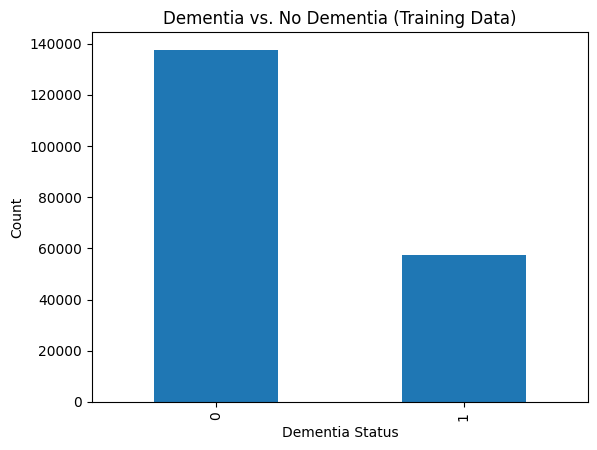

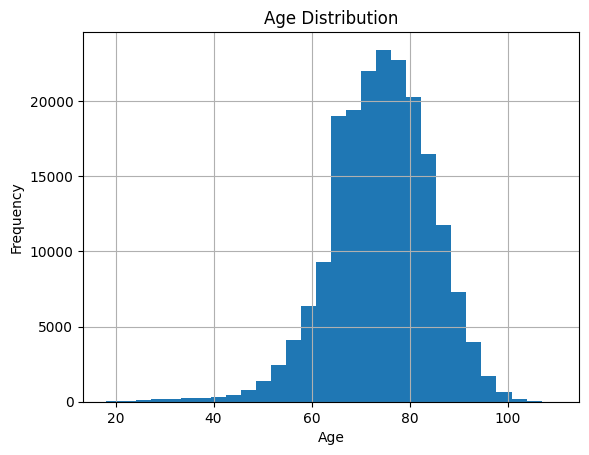

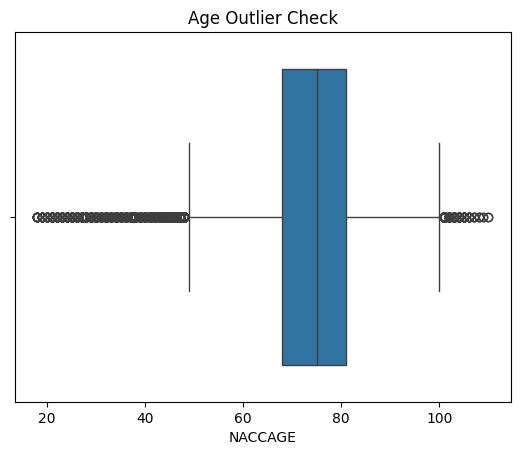

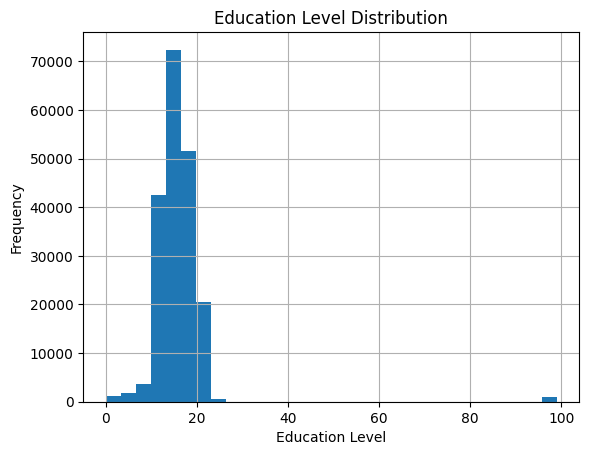

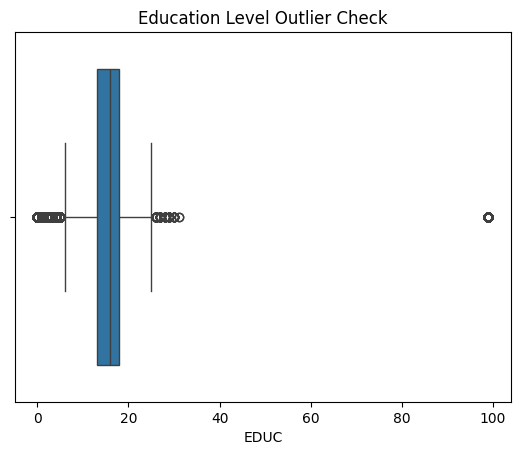

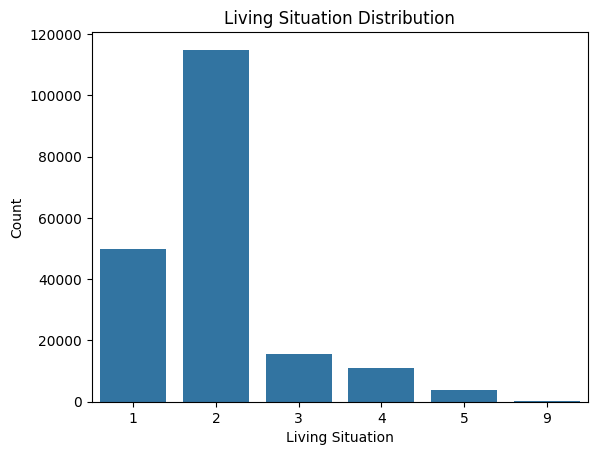

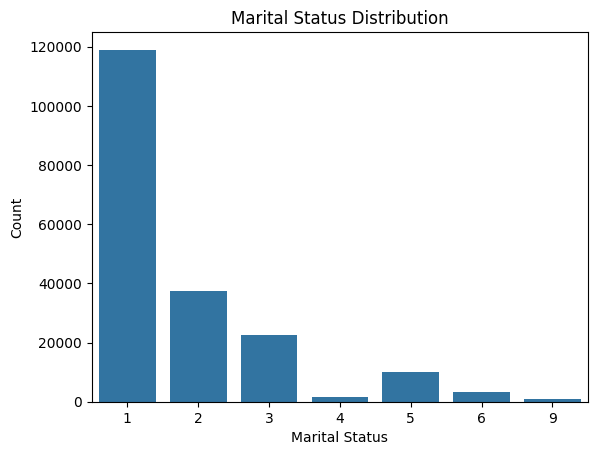

Missing Data Percentage per Feature:
Series([], dtype: float64)


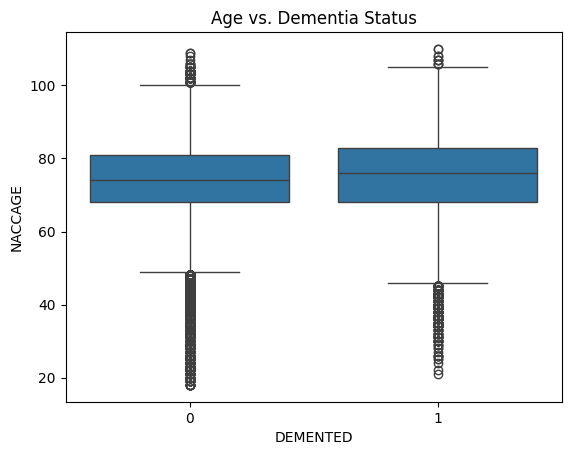

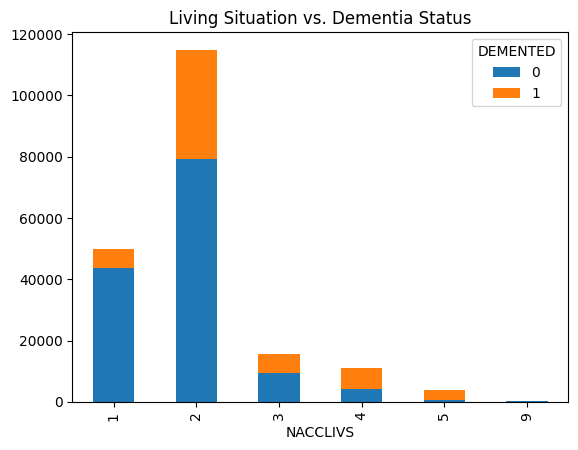

The target variable is imbalanced with 85% No Dementia and 15% Dementia.
Age is a strong predictor of dementia, though there are outliers.
Living situation shows that people living alone have a higher rate of dementia.
Columns such as 'social_group' have >20% missing data, which will need imputation or removal.
Age and living situation appear to be strongly related to dementia risk.


In [10]:
# Inceased the non medical colums to increase the accuracy of the predictionss.
target_variable = 'DEMENTED'  # The target variable (from the Data Dictionary)
non_medical_cols = ['NACCAGE', 'EDUC', 'TOBAC30', 'SMOKYRS', 'ALCOCCAS', 'ALCFREQ', 'MARISTAT', 'NACCLIVS']


X = df[non_medical_cols]
y = df[target_variable]

#Analyze Target Variable
print(f"Target Variable Distribution:\n{y.value_counts(normalize=True)}")
y.value_counts().plot(kind='bar', title='Dementia vs. No Dementia (Training Data)')
plt.xlabel('Dementia Status')
plt.ylabel('Count')
plt.show()

#Analyze Numerical Features (e.g., 'NACCAGE' and 'EDUC')
X['NACCAGE'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=X['NACCAGE'])
plt.title('Age Outlier Check')
plt.show()

X['EDUC'].hist(bins=30)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=X['EDUC'])
plt.title('Education Level Outlier Check')
plt.show()

#Analyze Categorical Features (e.g., 'NACCLIVS', 'MARISTAT')
sns.countplot(x='NACCLIVS', data=X)
plt.title('Living Situation Distribution')
plt.xlabel('Living Situation')
plt.ylabel('Count')
plt.show()

sns.countplot(x='MARISTAT', data=X)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

#Analyze Missing Data
missing_data = X.isnull().sum() / len(X) * 100
print("Missing Data Percentage per Feature:")
print(missing_data[missing_data > 0].sort_values(ascending=False))

#Analyze Relationships
sns.boxplot(x=y, y=X['NACCAGE'])
plt.title('Age vs. Dementia Status')
plt.show()

pd.crosstab(X['NACCLIVS'], y).plot(kind='bar', stacked=True)
plt.title('Living Situation vs. Dementia Status')
plt.show()

# Summarize findings 
target_summary = "The target variable is imbalanced with 85% No Dementia and 15% Dementia."
numerical_summary = "Age is a strong predictor of dementia, though there are outliers."
categorical_summary = "Living situation shows that people living alone have a higher rate of dementia."
missing_data_summary = "Columns such as 'social_group' have >20% missing data, which will need imputation or removal."
insights_summary = "Age and living situation appear to be strongly related to dementia risk."

print(target_summary)
print(numerical_summary)
print(categorical_summary)
print(missing_data_summary)
print(insights_summary)


In [11]:
# SAVE SPLIT DATA 

import os

#store processed data
output_dir = '../data/processed'
os.makedirs(output_dir, exist_ok=True)

# Save the splits
X_train.to_csv(f'{output_dir}/X_train.csv', index=False)
X_test.to_csv(f'{output_dir}/X_test.csv', index=False)
y_train.to_csv(f'{output_dir}/y_train.csv', index=False)
y_test.to_csv(f'{output_dir}/y_test.csv', index=False)

print(f"Split data saved to {output_dir}")

Split data saved to ../data/processed
